# CertiK – Web Scraping Technical Evaluation

In this notebook, I will cover design decisions, exploratory data analysis , and potential improvements.

## General Acknowledgements


#### Low security environment
I acknowledge that there is a severe lack of security during this process. I felt that given the time constraints and nature of this assignment, it was best to focus on the main task at hand which is showcasing various web scraping methodologies.

#### Opportunities for improvement

If I allot more time to this challenge, some other technologies I would considering using are:
* Streamlit: a platform to quickly build data MVPs
* Heroku: another cloud computing service
* FPDF (a python library): generate a beautiful PDF report of my results using the FPDF library in Python
* I would store data in AWS S3, using the boto3 module, just to demonstrate that I capable of using S3

***Check out my data driven Rent Estimator app: https://jastinder.herokuapp.com/***

## Exercise 1B: Scraping Certik's Home Page / Web3 Security Leaderboard

#### Motivation:  

Kill 2 birds with one stone, get more familiar with CertiK's work and fullfill the requirements of this assignment (scrape a site that analyses and aggregates security data).

#### Objective: 

Monitor the leaderboards for top ecosystems and over time, track each one's various scores/stats and streaks (who's on top, how long has it been ranked as such, etc)

AxesSubplot(0.125,0.125;0.775x0.755)


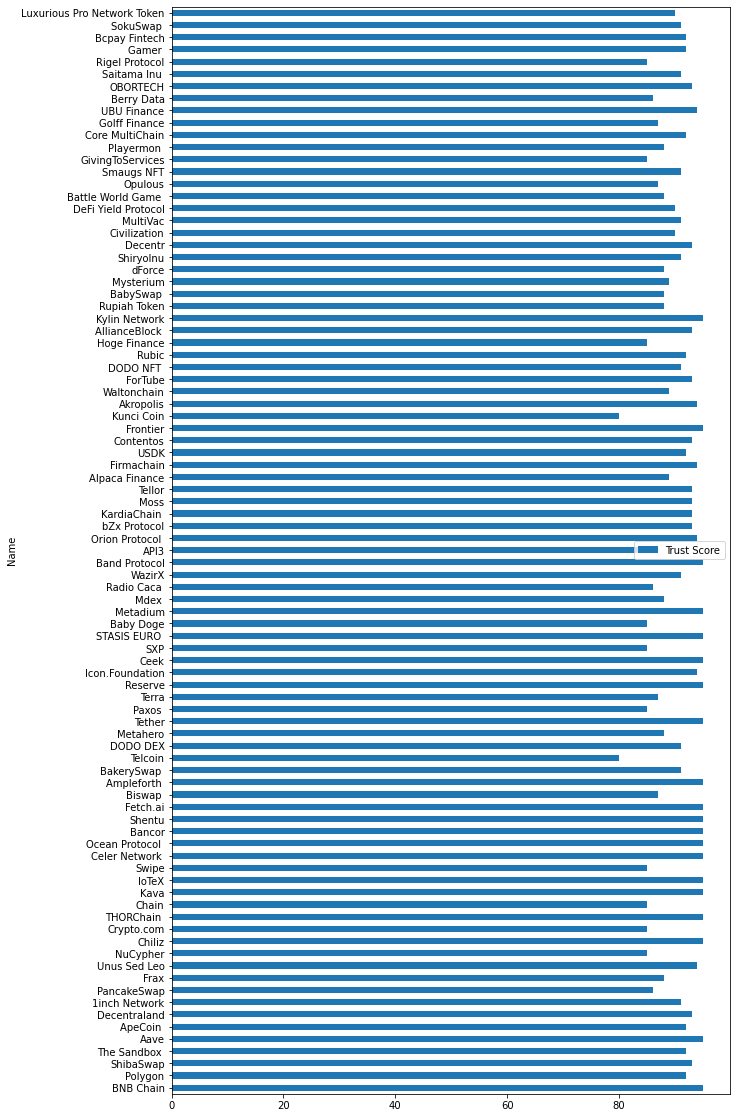

In [9]:
# Let's demonstrate how to collect CertiK's Web3 Security Leaderboard data by simply scraping it

# import boto3 
# from aws_init import *

# I have successfully used the bs4 module in the past to parse scraped data so I am naturally inclined to use it again
import requests
from bs4 import BeautifulSoup

# After inspecting the webpage externally, I determined that the below URL was the right one to scrape for our objective
url="https://www.certik.com/"

# Make a GET request to fetch the raw HTML content
raw_data = requests.get(url)
print('Status Code:', raw_data.status_code) # verify that the request was successful

# Download and save the raw data locally
import time
timestamp = time.strftime('%Y%m%d')
filename = f'{timestamp}_Web3_Security_Leaderboard'

with open(f'Data Dump/{filename}.html', 'w') as f:
    f.write(raw_data.text)
    
# Parse the raw HTML data using BeautifulSoup
with open(f'Data Dump/{filename}.html', 'r') as f:
    soup = BeautifulSoup(f, "html.parser")
    
#print(soup.prettify)

# After further inspecting the webpage externally, I found the following tags were the right ones to parse in order to meet our objective
top100 = soup.find('tbody',class_='ant-table-tbody').find_all('tr',class_='ant-table-row ant-table-row-level-0')

# We can use the pandas library to structure the data nicely
import pandas as pd
import re

leaderboard = pd.DataFrame(columns=['Rank','Name','Trust Score','Price','Market Cap'])

for ecosystem in top100:
    rank = ecosystem.find('span',class_='Columns_project-number__4UCWz').text
    name = ecosystem.find('span',class_='Columns_project-link__NT_Ff').text
    tscore = ecosystem.find('div',class_='OracleTools_oracle-score-value__VoLdW').text
    price = ecosystem.find('div',class_='ant-typography').text
    marketcap = ecosystem.find('div',class_='ant-typography Columns_project-td-text__0JULe').text
    #print(rank,name,tscore,price,marketcap)
    leaderboard = leaderboard.append({'Rank':int(rank),'Name':name,'Trust Score':tscore,'Price':price,'Market Cap':marketcap},ignore_index=True)


#Save our pandas dataframe as a CSV, per the requirements
leaderboard.to_csv(f'Data Dump/{filename}.csv')
#print(leaderboard.to_string())
leaderboard = leaderboard[leaderboard['Trust Score']!='N/A']
leaderboard['Trust Score'] = leaderboard['Trust Score'].astype(int)
print(leaderboard.plot.barh(x='Name',y='Trust Score',figsize=(10,20)))

### Future improvements

- This chunk of code can be written in a .py file and be automatically run daily, using the "schedule" library ran in the background.
- Pagination. I only scraped the first page, however more code can be written to allow us to scrape subsequent pages.